In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


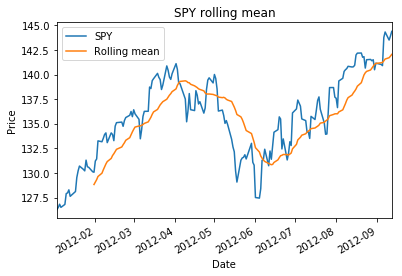

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df
 

def test_run():
    # read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    # Plot SPY data, retain matplotlib axis object
    ax = df['SPY'].plot(title="SPY rolling mean", label='SPY')
    
    # compute rolling mean using a 20-day window
    rm_SPY = pd.rolling_mean(df['SPY'], window=20)
    
    # Add rolling mean to same plot
    rm_SPY.plot(label='Rolling mean', ax=ax)
    
    #add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
if __name__ == "__main__":
    test_run()

## Bollinger Bands

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


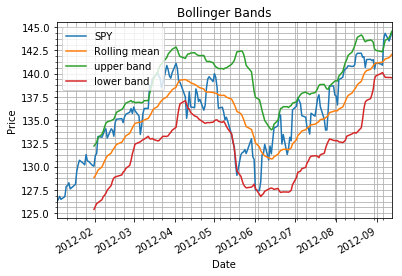

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size"""
    return pd.rolling_mean(values, window=window)

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size"""
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands"""
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band
      

def test_run():
    # read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    #Compute Bollinger Bands
    #1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)
    
    #2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)
    
    #3 Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and bollinger bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)
    
    
    #add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    ax.grid(True, which='both')
    plt.minorticks_on()
    plt.show()
    
if __name__ == "__main__":
    test_run()

## Daily Returns

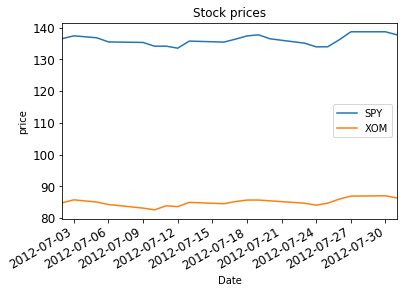

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


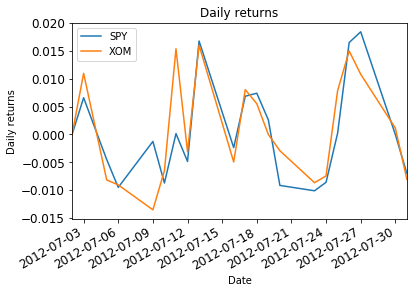

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="price"):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def compute_daily_returns(df):
    """Compute and return the daily return values"""
    daily_returns = df.copy() # copy given DataFrame to mathc size and column names
    # compute daily returns for row 1 onwards
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns


def test_run():
    # read data
    dates = pd.date_range('2012-07-01', '2012-07-31')
    symbols = ['SPY', 'XOM']
    df = get_data(symbols, dates)
    plot_data(df)
    
    #Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
if __name__ == "__main__":
    test_run()

## Daily Returns - directly with pandas df

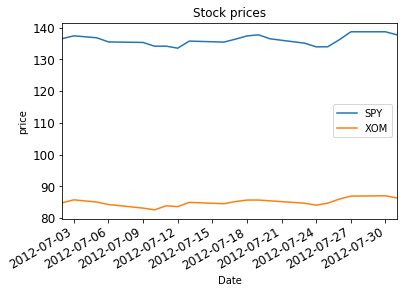

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


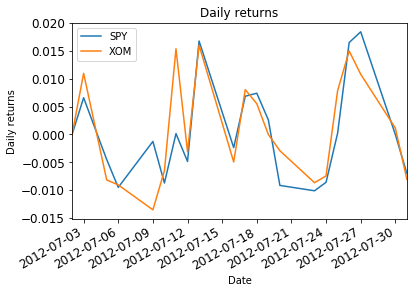

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="price"):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def compute_daily_returns(df):
    """Compute and return the daily return values"""
    daily_returns = (df / df.shift(1)) - 1    # much easier with pandas
    daily_returns.ix[0,:] = 0 # pandas leaves the 0th row full of Nans
    return daily_returns


def test_run():
    # read data
    dates = pd.date_range('2012-07-01', '2012-07-31')
    symbols = ['SPY', 'XOM']
    df = get_data(symbols, dates)
    plot_data(df)
    
    #Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
if __name__ == "__main__":
    test_run()

## Cumulative returns

In [14]:
#Formula: cumret[t] = (price[t]/price[0]) - 1

#Example: spy 2012 was: $125 at time[0] and $142 at time[t]
price_t0 = 125.0
price_tt = 142.0

cum_return = (price_tt / price_t0) - 1
cum_return_percent = cum_return * 100
print(cum_return_percent)

13.6
